<img src="https://iteso.mx/documents/27014/202031/Logo-ITESO-MinimoH.png"
     align="right"
     width="200"/>

# Clasificador de Imágenes usando Redes Neuronales

## Estimación Óptima - Pedro Martinez

## Equipo: Maria Paula, Pato, Dafne y Pepe Chuy

---

### *Introducción*

Uno de los problemas a los que se enfrentan los data scientist es el entrenar redes neuronales con pocos datos, ya sea porque es muy costoso obtener la información, o bien, porque los tiempos de entrenamiento son muy largos. Una de las maneras de resolver esto, es utilizar los pesos/parámetros de una red neuronal que ya haya sido entrenada para una tarea similar y tropicalizar la salida para que se ajuste a nuestras necesidades, a este procedimiento se le conoce como transferencia de aprendizaje. A continuación se muestra un breve tutorial.

### *Creación del set de datos*

Supongamos que queremos desarrollar una red neuronal que sea capaz de clasificar entre cuchillos, cucharas y tenedores. Par ello necesitaremos crear 3 carpetas donde residiran los archivos de imagenes. Una buena manera de realizar descargas masiva de imágenes es utilizando la extensión de chrome **Download all images** se puede obtener en el siguiente link:

 https://chrome.google.com/webstore/detail/download-all-images/ifipmflagepipjokmbdecpmjbibjnakm?hl=en

Una vez que se cuenta con las imagenes ya limpias, es necesario subirlo al google colab, para ello ejecutamos el siguiente comando:


In [79]:
#Crear las carpetas para subir las imagenes
!mkdir Eyelash_Curler
!mkdir guasha
!mkdir Mascara
!mkdir Palette
!mkdir Sponge

Ya existe el subdirectorio o el archivo Eyelash_Curler.
Ya existe el subdirectorio o el archivo guasha.
Ya existe el subdirectorio o el archivo Mascara.
Ya existe el subdirectorio o el archivo Palette.
Ya existe el subdirectorio o el archivo Sponge.


Una vez colocado el archivo zip con las imagenes en la carpeta correspondiente, procedemos a descomprimirlo.



Ahora realizamos un análisis para empezar a conocer cuantos elementos tengo de cada categoría.

In [80]:
import os
#Mostrar cuantas imagenes tengo de cada categoria
# hacerlo para todas las categorias
# !ls -1 brush | wc -l
categories = ['Eyelash_Curler', 'guasha', 'Mascara', "Palette",'Sponge']
image_counts = {}

for category in categories:
    image_counts[category] = len(os.listdir(category))

image_counts



{'Eyelash_Curler': 741,
 'guasha': 1234,
 'Mascara': 771,
 'Palette': 907,
 'Sponge': 894}

Ahora procedemos a analizar su tamaño y forma en python.

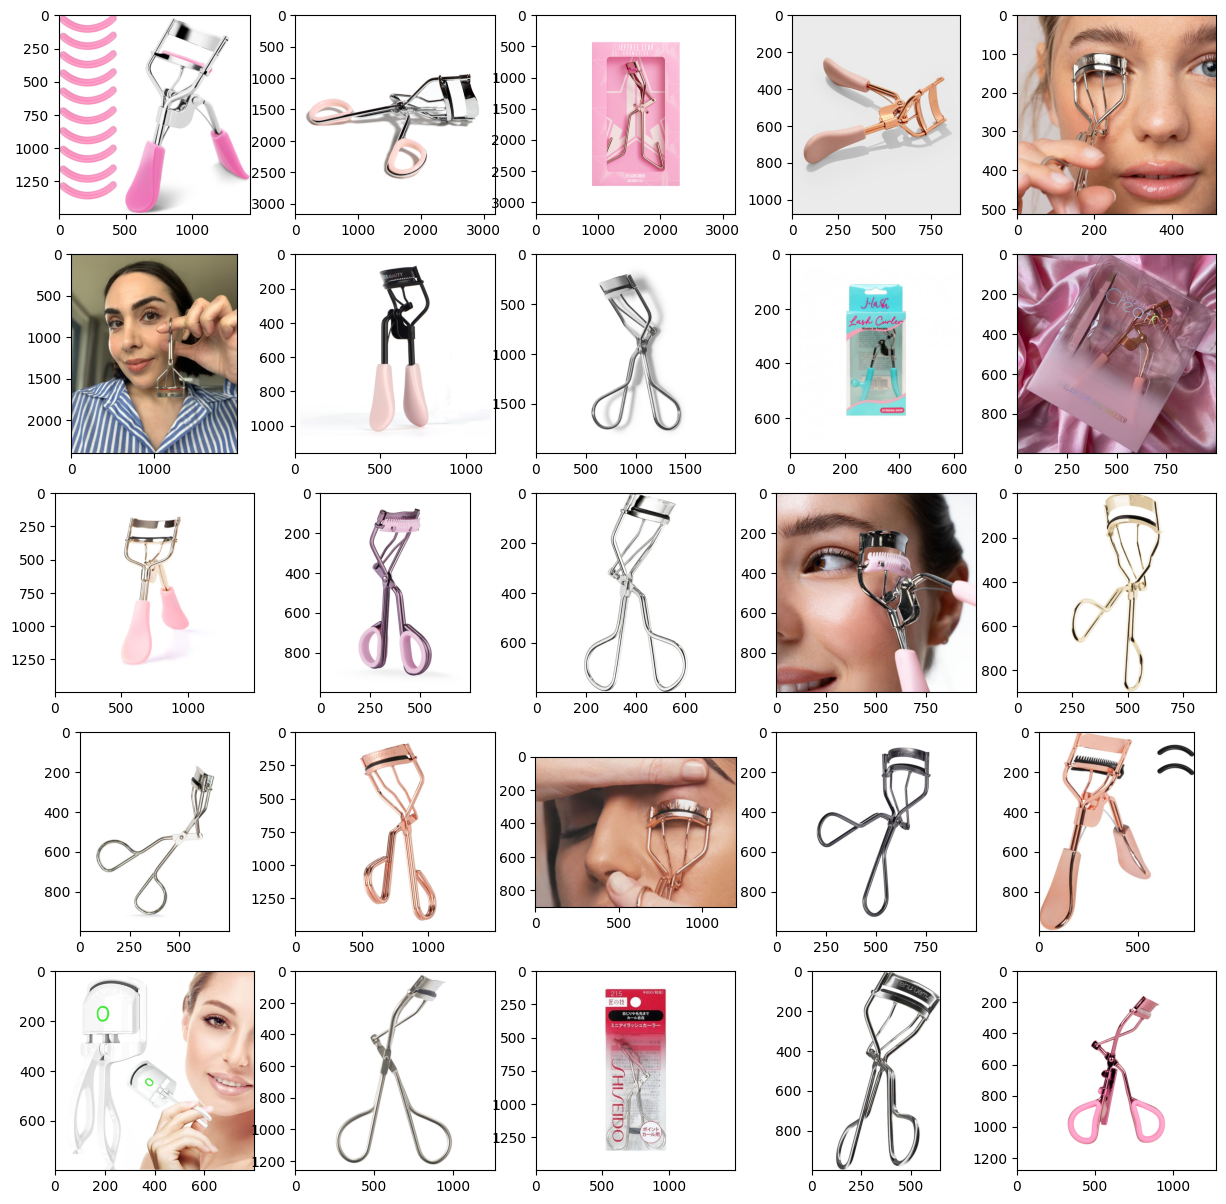

In [81]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = 'Eyelash_Curler'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

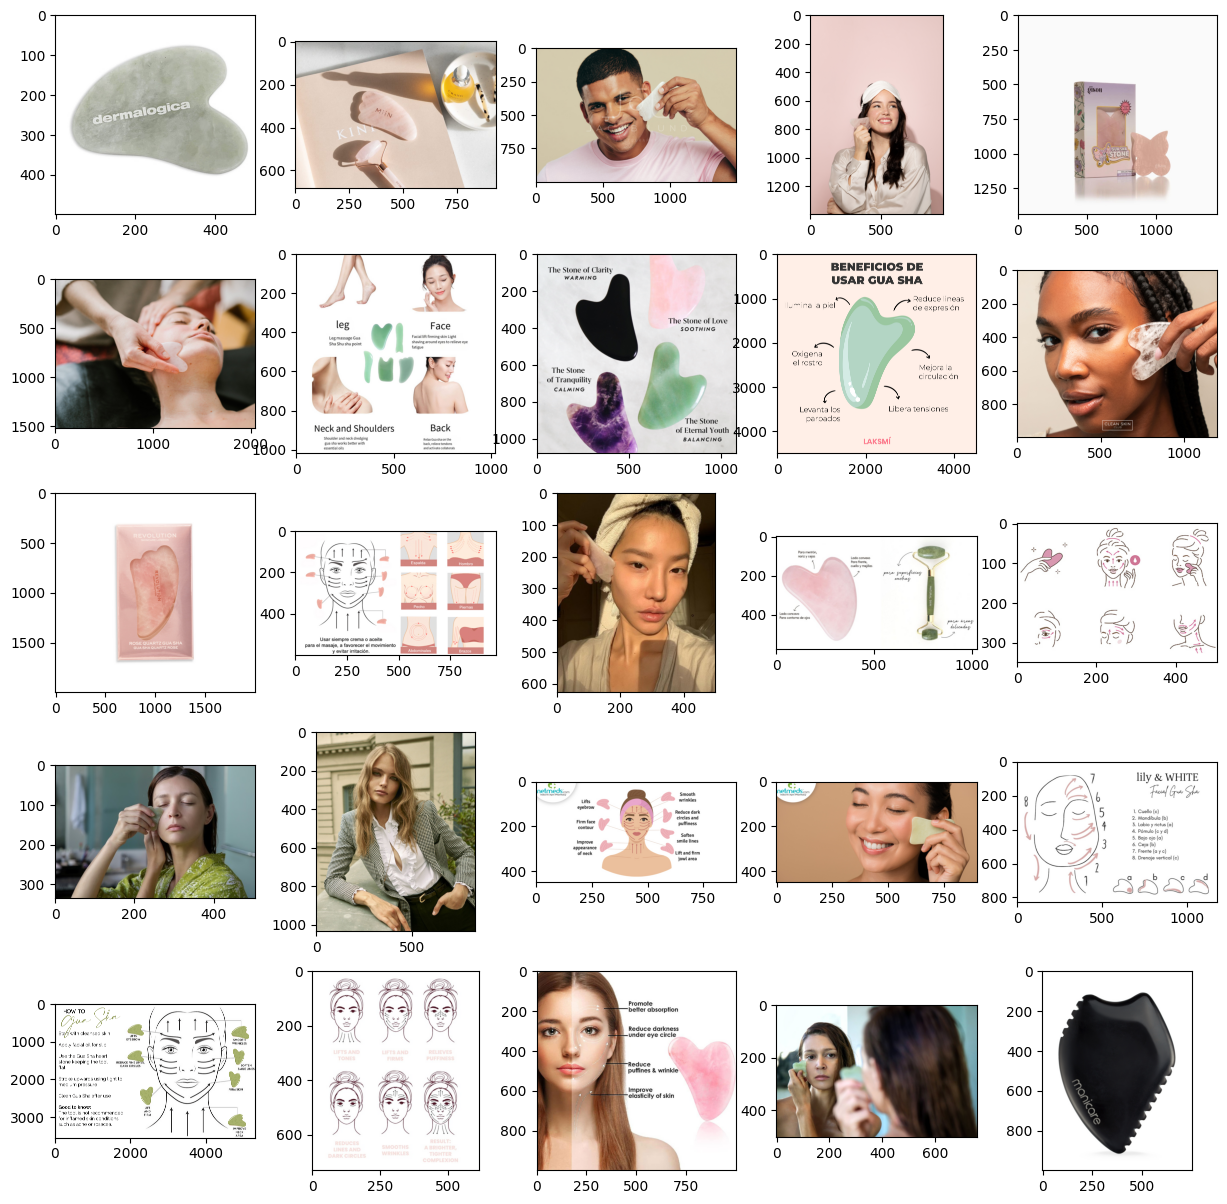

In [82]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = 'guasha'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

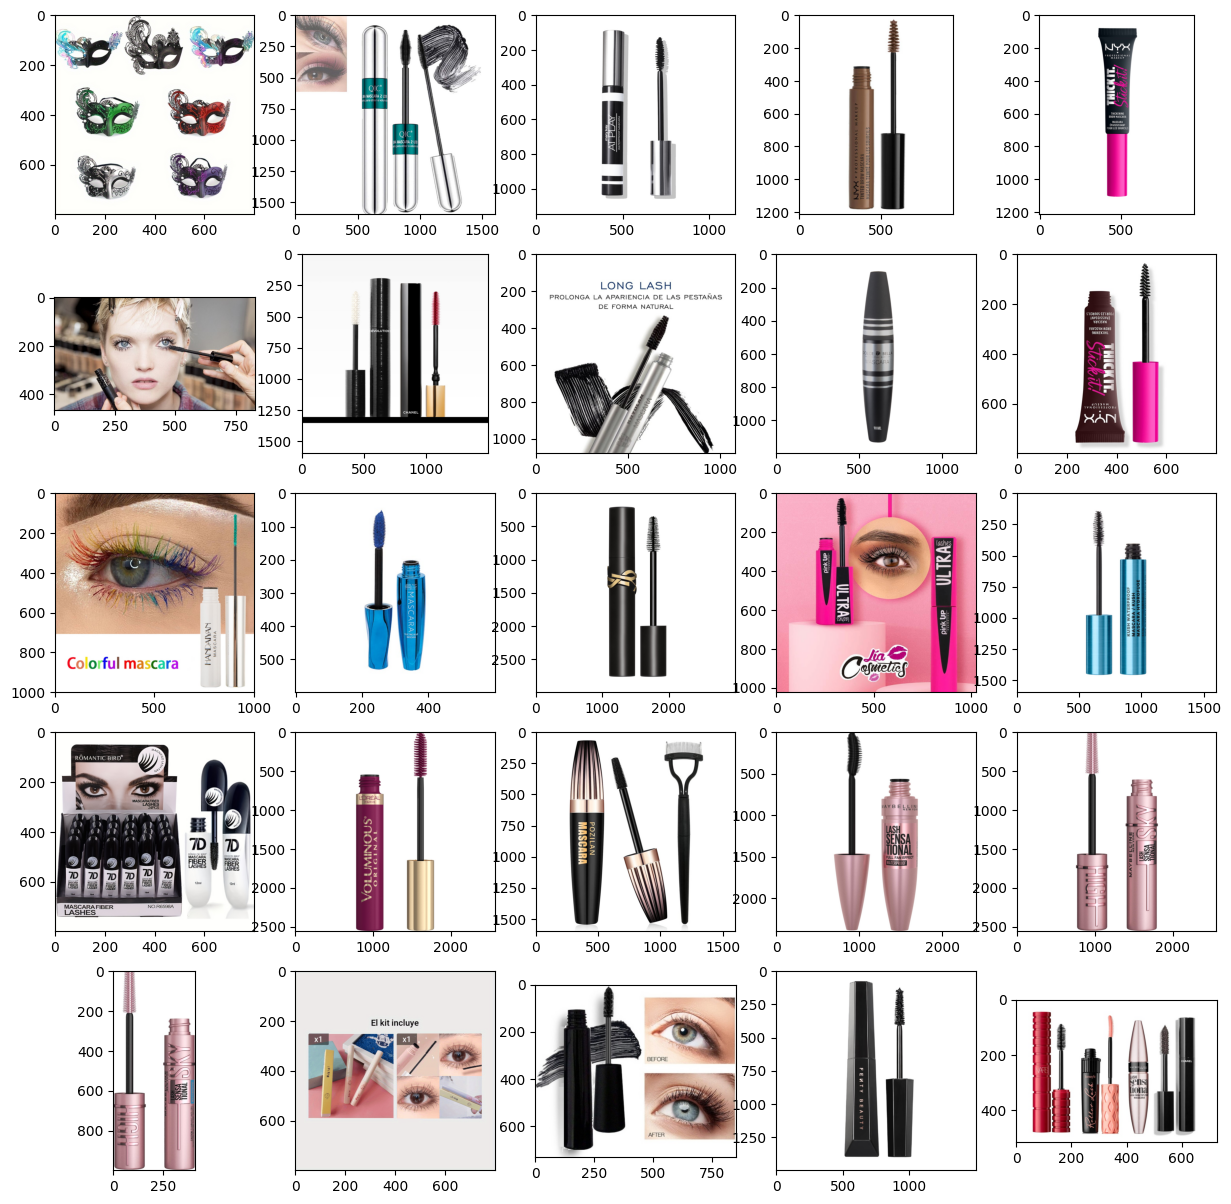

In [83]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = 'Mascara'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

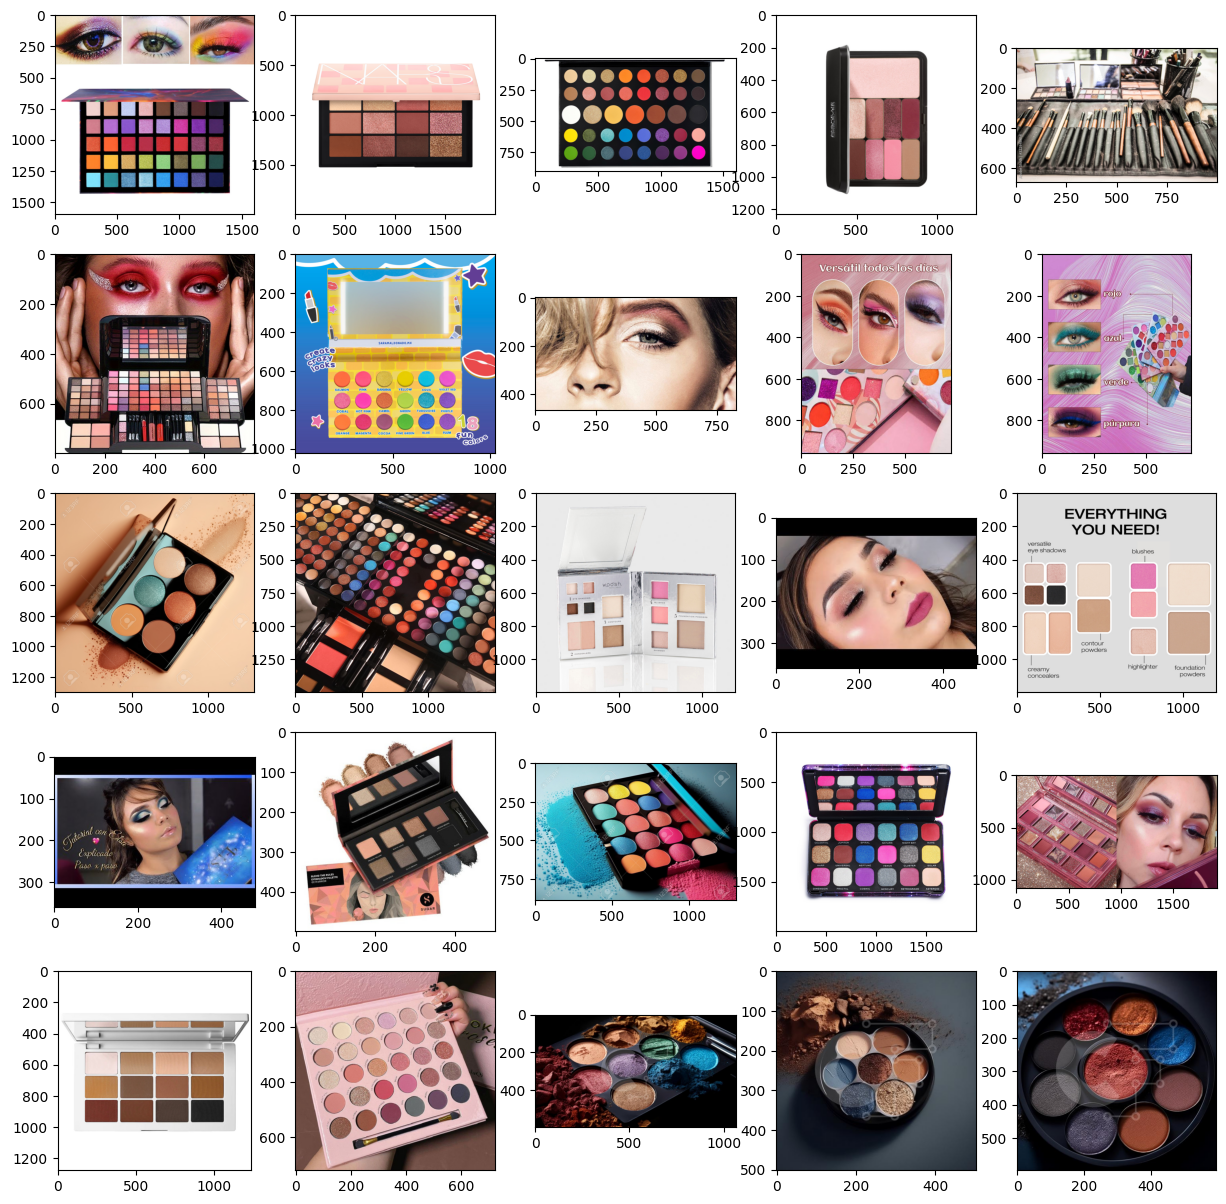

In [84]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = 'Palette'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

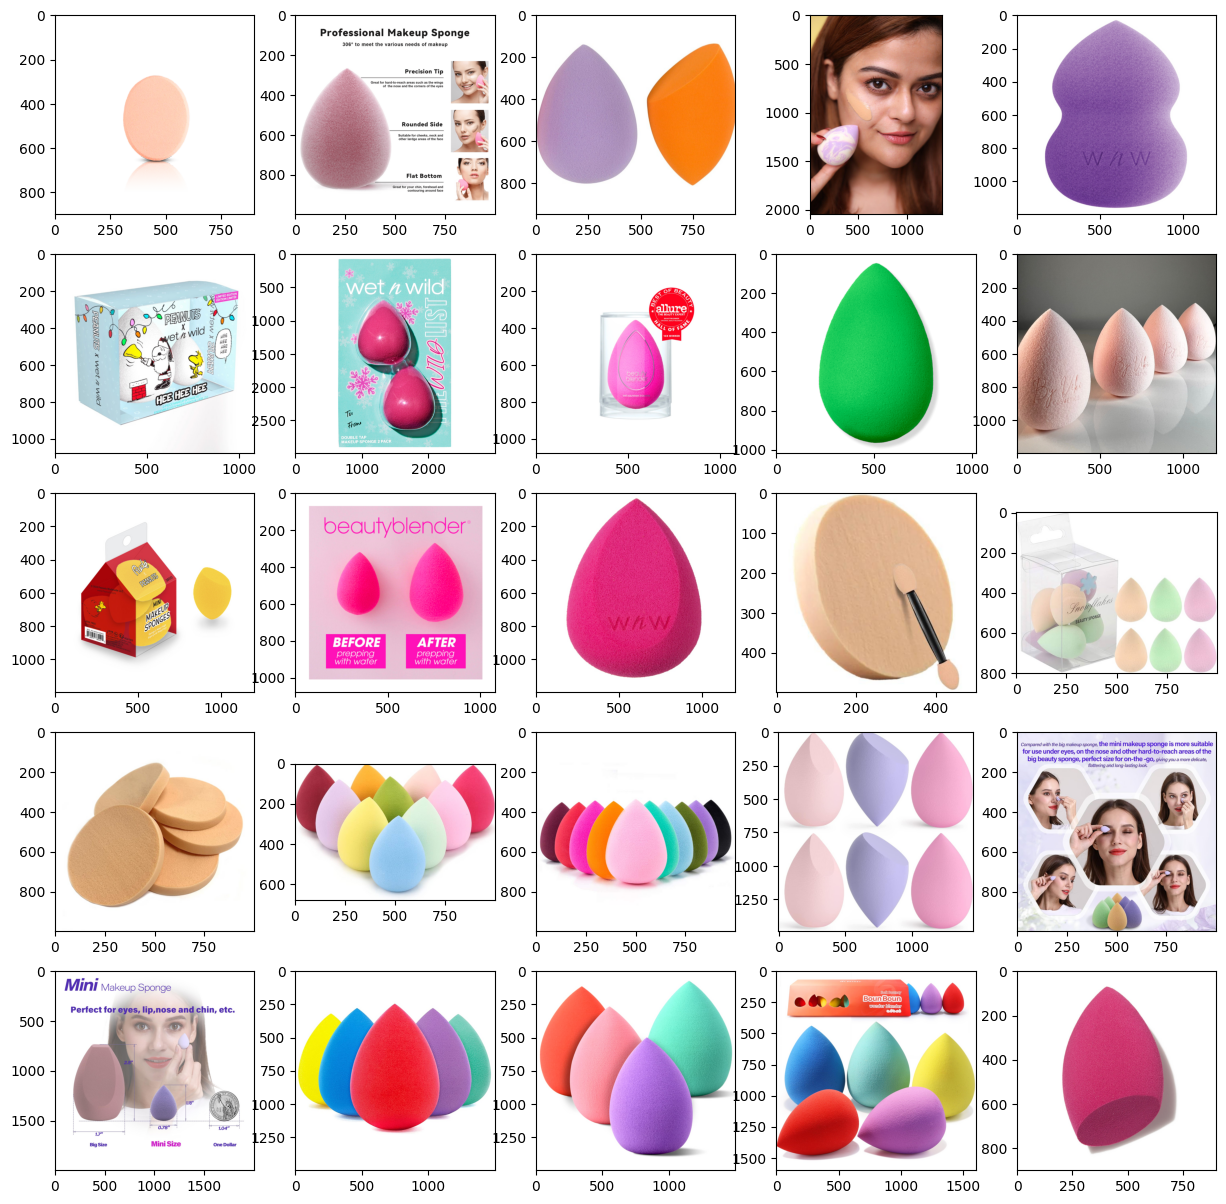

In [85]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = 'Sponge'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

Debido a que estamos trabajando con imagenes, si creamos un dataset de manera convencional, todo el contenido sería almacenado en memoria RAM, lo cual no es eficiente. Hay maneras de almacenar datasets sin que se guarden en memoria RAM. Adicional, debemos asegurarnos que se utilicen el mismo número de entradas para cada clase a clasificar. Para ello, realizamos lo siguiente:

In [86]:
#Crear carpetas separadas para hacer el set de datos

import os

# Crear la carpeta 'dataset'
os.mkdir('dataset')

# Crear las subcarpetas dentro de 'dataset'
subcarpetas = ['Eyelash_Curler', 'guasha', 'Mascara', "Palette",'Sponge']
for subcarpeta in subcarpetas:
    os.mkdir(os.path.join('dataset', subcarpeta))


In [9]:
import shutil

In [87]:
carpeta_fuente = 'Eyelash_Curler'
carpeta_destino = 'dataset/Eyelash_Curler'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 741:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [93]:
carpeta_fuente = 'guasha'
carpeta_destino = 'dataset/guasha'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 741:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [94]:
carpeta_fuente = 'Mascara'
carpeta_destino = 'dataset/Mascara'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 741:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [95]:
carpeta_fuente = 'Palette'
carpeta_destino = 'dataset/Palette'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 741:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [96]:
carpeta_fuente = 'Sponge'
carpeta_destino = 'dataset/Sponge'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 741:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [97]:
import os
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
# hacerlo para todas las categorias


categories = ['Eyelash_Curler', 'guasha', 'Mascara', "Palette",'Sponge']
image_counts = {}

for category in categories:
    image_counts[category] = len(os.listdir('dataset/' + category))

image_counts




{'Eyelash_Curler': 741,
 'guasha': 741,
 'Mascara': 741,
 'Palette': 741,
 'Sponge': 741}

Una técnica a utilizar cuando hay pocas imagenes es utilizar el **aumento de datos**, lo cual es básicamente utilizar las mismas imagenes pero realizando transformaciones (girarlas, estirarlas, voltearlas, invertirlas, etc).

Para preparar el set de datos de imagenes, se utilizará la librería de tensorflow image. Aprovechamos y redimensionamos todas las imagenes a tamaño 225x225px (es lo que acepta como entrada mobileNet_v2)

Found 2920 images belonging to 5 classes.
Found 727 images belonging to 5 classes.


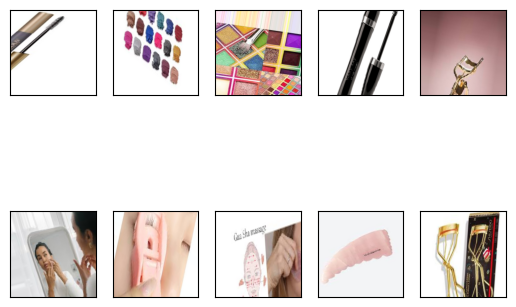

In [98]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador que hace imagenes con transformaciones
datagen = ImageDataGenerator(
    rescale=1. / 255,  # Escalar de 0 a 1 en lugar de 255
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
# Se pide que sea estandarizado a 224x224
data_gen_entrenamiento = datagen.flow_from_directory('dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


### *Creación de la red neuronal*

Una vez que se tiene un dataset definido, es momento de importar la red neuronal ya entrenada que usaremos como base. Para ello podemos seleccionar una desde tensorflow hub https://www.tensorflow.org/hub en este caso seleccionaremos mobile net v2.

Dentro del repositorio podemos encontrar la red completa, sin embargo, como se mencionó al principio, usaremos esta red, pero modificando la capa de salida para que se ajuste a nuestros intereses. Para ello se selecciona la red "feature vector" y copiamos el url.

In [99]:
# Comenzamos a crear la red neuronal en tensorflow
import tensorflow as tf
# Te permite conectarte a tensorflow hub
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# Tamaño y clases a considerar de las imagenes
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

Una de las partes más importantes del proceso para transfer learning es congelar las capas intermedias de la red neuronal, permitiendo que sólo se ajuste la capa de salida. Para ello, ejecutamos el siguiente código:

In [100]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [101]:
# Creamos modelo con 3 capas y funcion de activación softmax
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(5, activation='softmax')
])

In [102]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [103]:
# Compilar el modelo para diseñar su estructura
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [104]:
#Entrenar el modelo para obtener los parametros óptimos
EPOCAS = 10

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/10
71/92 [======================>.......] - ETA: 18s - loss: 0.8505 - accuracy: 0.6873

C:\Users\mpper\AppData\Roaming\Python\Python38\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


92/92 [==============================] - 116s 1s/step - loss: 0.7855 - accuracy: 0.7158 - val_loss: 0.5287 - val_accuracy: 0.8212
Epoch 2/10
92/92 [==============================] - 106s 1s/step - loss: 0.4338 - accuracy: 0.8562 - val_loss: 0.4622 - val_accuracy: 0.8322
Epoch 3/10
92/92 [==============================] - 92s 996ms/step - loss: 0.3776 - accuracy: 0.8675 - val_loss: 0.4159 - val_accuracy: 0.8556
Epoch 4/10
92/92 [==============================] - 84s 918ms/step - loss: 0.3414 - accuracy: 0.8815 - val_loss: 0.3950 - val_accuracy: 0.8542
Epoch 5/10
92/92 [==============================] - 84s 914ms/step - loss: 0.3171 - accuracy: 0.8914 - val_loss: 0.4382 - val_accuracy: 0.8294
Epoch 6/10
92/92 [==============================] - 84s 912ms/step - loss: 0.2998 - accuracy: 0.8990 - val_loss: 0.3838 - val_accuracy: 0.8652
Epoch 7/10
92/92 [==============================] - 83s 906ms/step - loss: 0.3055 - accuracy: 0.8983 - val_loss: 0.3656 - val_accuracy: 0.8735
Epoch 8/10
92/

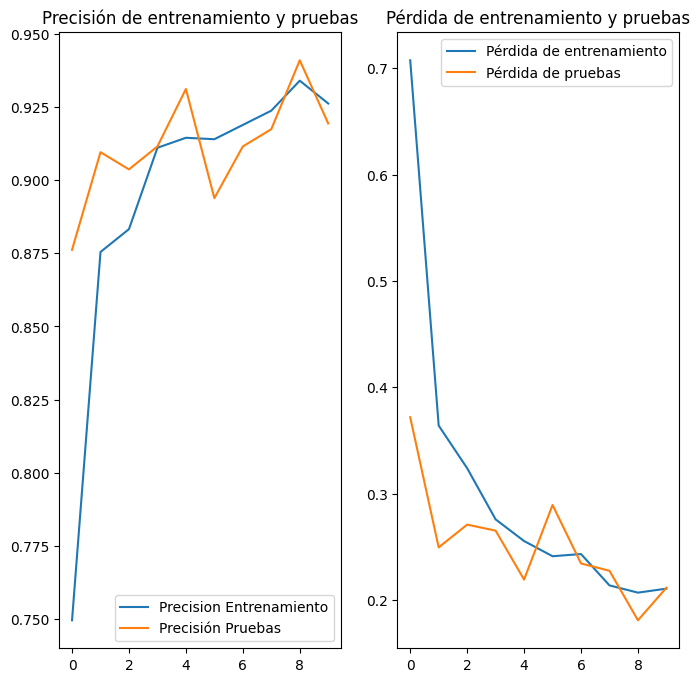

In [23]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(10)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precision Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

Una vez completado el modelo, podemos hacer una función que reciba una url, la normalice y clasifique usando nuestro predictor

In [24]:
# Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [25]:
class_dict = {
0: 'enchinador',
 1: 'mascara',
 2: 'pallete',
 3: 'sponge',
 4: 'guasha'}

In [26]:
# 0 = enchinador
# 1 =  mascara
# 2 = pallete
# 3 = sponge 
# 4 = guasha

In [134]:
url = "https://media.glamour.mx/photos/63dc7225c6221f99aba3e50a/16:9/w_2560%2Cc_limit/esponjas_de_maquillaje_mandamientos.jpg"
prediccion = categorizar (url)
print(class_dict[prediccion])

1/1 [==============================] - 0s 48ms/step
sponge
